# Extract tables from PDF starter template

Using [Camelot](https://camelot-py.readthedocs.io/en/master/)
- dependencies include Ghostscript, Tkinter.
- [Apache PDFBox Debugger](https://pdfbox.apache.org/download.html) helpful for identifying x,y coordinates in pdf file.

Used option for stream rather than default lattice parser due to 'extraction en masse' approach.
When fine-tooling, if focused on more specific set of tables, may be worth giving lattice another look.
In this version, stream is reading everything within table boundaries as one table.
Lattice is more attentive to table lines, see [Camelot's 'How it Works'](https://camelot-py.readthedocs.io/en/master/user/how-it-works.html).

In [21]:
# import libraries
import camelot

In [22]:
# Read pdf file
pdf_file = '/mnt/c/Users/sheblel/Documents/pdf_extraction/input_pdf/Detroit Connect 3-1-3 BBK 5.10.2022.pdf'
tables = camelot.read_pdf(pdf_file, 
                          # file reader
                          flavor='stream', 
                          # row sensitivity ( 1=more rows; 100=fewer rows)
                          row_tol=8, 
                          # page coordinates containing table ['x1,y1,x2,y2']
                          table_areas=['12,730,605,44'], 
                          # char to strip before saving values
                          strip_text='()\t\n', 
                          # file pages to read
                          pages='1-10'
                          )

## Removed
## space allowed between text edges: edge_tol=36

/tmp/ipykernel_4005/2409700592.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='contour').show()


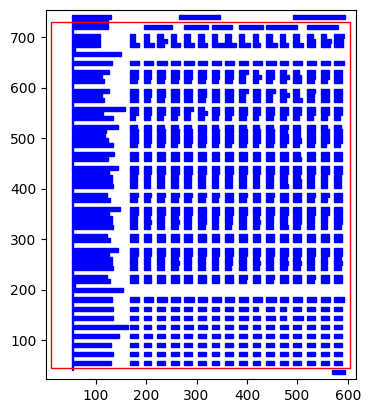

In [23]:
# run matplotlib inline
%matplotlib inline

# show contour plot of page 1 table 
## note:  page interpreted as having one table
camelot.plot(tables[0], kind='contour').show()

In [24]:
# Preview table as pandas df
tables[0].df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,REGION,,,INTERNET,MODE,,,2-3-2 PARTY,,3-1-3 PARTY,,,IDEOLOGY,
1,,,,,,,,,,,,,,,,,Con
2,,,,Cent,,,,,,,,,,,Lib,Mod,serv
3,,Total,West,ral,East,Yes,No,,Phone SMS,Dem,Ind,Dem,Ind,Rep,eral,erate,ative
4,ey Measure Summary ...,,,,,,,,,,,,,,,,
5,Total answering,600,276,150,174,480,120,525,75,342,195,414,93,66,175,207,141
6,232 Dem,57,65,57,44,54,67,57,55,100,-,83,-,-,77,53,56
7,Ind,33,25,34,44,35,24,32,37,-,100,17,100,46,21,41,23
8,Rep,6,5,4,9,6,5,6,7,-,-,-,-,54,1,5,17
9,313 Dem,69,72,69,63,68,74,70,64,100,37,100,-,-,90,69,61


In [25]:
# Number of tables identified
tables

<TableList n=10>

In [26]:
# Dimensions of first table
tables[0]


<Table shape=(52, 17)>

In [27]:
# Summary of file parsing accuracy
tables[0].parsing_report

{'accuracy': 25.41, 'whitespace': 8.37, 'order': 1, 'page': 1}

In [28]:
csv_out_file = '/mnt/c/Users/sheblel/Documents/pdf_extraction/input_pdf/Detroit Connect 3-1-3 BBK 5.10.2022_stream_t1.csv'
tables[0].to_csv(csv_out_file)

In [29]:
# Export all tables
excel_out_file = '/mnt/c/Users/sheblel/Documents/pdf_extraction/input_pdf/Detroit Connect 3-1-3 BBK 5.10.2022_stream_p1-10.xlsx'
tables.export(excel_out_file, 
              f='excel', 
              compress=True)

/home/laura/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)
/home/laura/.local/lib/python3.8/site-packages/camelot/core.py:752: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()
